# Radon API - Podstawy

Notatnik przedstawia użytkownikom proces pobierania danych z platformy Radon za pomocą [REST API](https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon) i przeprowadzanie prostych analiz za pomocą języka Python oraz kilku podstawowych bibliotek. 

Dane dostępne w ramach usługi API są tożsame z tymi dostępnymi pod adresem [radon/Dane](https://radon.nauka.gov.pl/dane).

Notatnik stworzony został z myślą o użytkownikach z podstawową znajomością języka Python i ze znikomym doświadczeniem w korzystaniu z API.

W ramach notatnika opisano podstawowe zapytania do API z różnymi parametrami, odpowiedzi API oraz przedstawiono proste wizualizacje danych pobranych z API.

### Przykład: Pracownicy

Dokumentacja API do usługi Pracownicy POL-on. API umożliwia pobranie publicznie dostępnych danych na temat nauczycieli akademickich, innych osób prowadzących zajęcia, osób prowadzących działalność naukową oraz osób biorących udział w jej prowadzeniu. Wykaz obejmuje osoby posiadajace aktywne zatrudnienie (badane są data od i data do warunków zatrudnienia pracownika - tzn. na dany dzień muszą istnieć aktywne warunki zatrudnienia). Dane są aktualizowane raz dziennie (w nocy) - zwracany jest stan danych POL-on z dnia poprzedniego.  

https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_employee

In [ ]:
!pip install -r requirements.txt

In [2]:
# Biblioteki
# Python=3.10.13

import requests
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

Podstawową akcją przy korzystaniu z API jest tworzenie zapytań. Szczegóły zapytania są określane przez parametry.

In [3]:
# Podstawowe zapytanie do usługi pracownicy
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'resultNumbers': 1})
response.json()

{'results': [{'professionalTitles': None,
   'lastRefresh': '1693484586782',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': '8374e1ef-a94c-44ab-a435-8f52c983f8c3',
     'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
     'employingInstitutionName': 'Uniwersytet Warszawski'}],
   'personalData': {'firstName': 'Jakub',
    'middleName': 'Mariusz',
    'lastName': 'Turczyn',
    'lastNamePrefix': None},
   'employments': [{'startDate': '2019-10-01',
     'employingInstitutionName': 'Uniwersytet Warszawski',
     'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
     'basicPlaceOfWork': 'Nie dotyczy',
     'declaredDisciplines': {'firstDisciplineName': None,
      'firstDisciplineCode': None,
      'secondDisciplineName': None,
      'secondDisciplineCode': None}}],
   'disciplinaryPenalties': None,
   'penaltyMarker': False,
   'academicTitles': None,
   'managerialFunctions': [],
   'calculatedEduLevel': None,
   'academicDegrees': 

Dane są zwracane w formacie json, który składa się z uporządkowanych par kluczy i wartości oraz list. Dostęp do wartości uzyskuje się za pomocą kluczy i indeksów, na przykład, aby uzyskać dostęp do danych osobowych pierwszego pracownika w odpowiedzi, należy najpierw przejść do "results", wybrać pierwszą pozycję na liście, a następnie wybrać "personalData".

In [4]:
response.json()['results'][0]['personalData']

{'firstName': 'Jakub',
 'middleName': 'Mariusz',
 'lastName': 'Turczyn',
 'lastNamePrefix': None}

In [5]:
response.json()['results'][0]['employments']

[{'startDate': '2019-10-01',
  'employingInstitutionName': 'Uniwersytet Warszawski',
  'employingInstitutionUuid': '511d4dfc-574e-4801-af14-e99dc24f8209',
  'basicPlaceOfWork': 'Nie dotyczy',
  'declaredDisciplines': {'firstDisciplineName': None,
   'firstDisciplineCode': None,
   'secondDisciplineName': None,
   'secondDisciplineCode': None}}]

Możliwe jest zażądanie konkretnych informacji z API w zapytaniu. Szczegóły zapytania są określane przez użyte parametry. Możliwe parametry można znaleźć w [dokumentacji](https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_employee).

In [6]:
# Pracownicy o imieniu "Jan" i nazwiku "Kowalski"
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'firstName': 'Jan', 'lastName': 'Kowalski'})
response.json()

{'results': [{'professionalTitles': [{'employeeInInstitutionUuid': 'f0336e0e-aa85-4265-ad70-44d4c1424742',
     'professionalTitleCode': 9,
     'professionalTitleName': 'Magister farmacji',
     'courseName': 'analityka',
     'institutionUuid': None,
     'institutionName': 'Śląska Akademia Medyczna im. L. Waryńskiego w Katowicach; Wydział Farmaceutyczny',
     'foreignInstitutionName': None,
     'graduationYear': '1977',
     'grantingCountry': None}],
   'lastRefresh': '1693486370882',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': 'f0336e0e-aa85-4265-ad70-44d4c1424742',
     'employingInstitutionUuid': 'cd474cbb-d4ba-4475-b0d0-580f5f2e17ef',
     'employingInstitutionName': 'Śląski Uniwersytet Medyczny w Katowicach'}],
   'personalData': {'firstName': 'Jan',
    'middleName': 'Alojzy',
    'lastName': 'Kowalski',
    'lastNamePrefix': None},
   'employments': [{'startDate': '1978-10-01',
     'employingInstitutionName': 'Śląski Uniwersytet Medyczny w Katowicach',

In [7]:
# Pracownicy z dyscypliny astronomii
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'disciplineName': 'astronomia'})
response.json()

{'results': [{'professionalTitles': None,
   'lastRefresh': '1693484592445',
   'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': '88c298bc-871c-4536-af4b-8f05017967d4',
     'employingInstitutionUuid': '218e39fb-d7f2-405a-a114-dbb87dc59898',
     'employingInstitutionName': 'Centrum Astronomiczne im. Mikołaja Kopernika Polskiej Akademii Nauk'}],
   'personalData': {'firstName': 'Cezary',
    'middleName': None,
    'lastName': 'Gałan',
    'lastNamePrefix': None},
   'employments': [{'startDate': '2020-10-08',
     'employingInstitutionName': 'Centrum Astronomiczne im. Mikołaja Kopernika Polskiej Akademii Nauk',
     'employingInstitutionUuid': '218e39fb-d7f2-405a-a114-dbb87dc59898',
     'basicPlaceOfWork': 'Tak',
     'declaredDisciplines': {'firstDisciplineName': 'astronomia',
      'firstDisciplineCode': 'DS010607N',
      'secondDisciplineName': None,
      'secondDisciplineCode': None}}],
   'disciplinaryPenalties': None,
   'penaltyMarker': False,
   'academicTitles'

In [8]:
# Całkowita liczba zwroconych pracowników
response.json()['pagination']['maxCount']

219

In [9]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", params={'resultNumbers': 1, 'disciplineName': 'nauki biologiczne'})
max_count = response.json()['pagination']['maxCount']
number_of_pages = math.ceil(max_count/100)

f"Jest {max_count} rekordów i zostaną pobrane w {number_of_pages} paczkach"

'Jest 3647 rekordów i zostaną pobrane w 37 paczkach'

In [10]:
employees_list = []
token = None

for _ in tqdm(range(number_of_pages)):
    response = requests.get("https://radon.nauka.gov.pl/opendata/polon/employees", 
                            params={'disciplineName': 'nauki biologiczne',
                                    'resultNumbers': 100, 
                                    'token': token}
                           )
    token = response.json()['pagination']['token']
    employees_list.extend(response.json()['results'])

  0%|          | 0/37 [00:00<?, ?it/s]

100%|██████████| 37/37 [00:31<00:00,  1.19it/s]


In [11]:
employees_list[0]

{'professionalTitles': [{'employeeInInstitutionUuid': 'd0a3a057-8d24-4af3-99d6-954ca1ce513e',
   'professionalTitleCode': 4,
   'professionalTitleName': 'Magister inżynier',
   'courseName': 'ogrodnictwo',
   'institutionUuid': None,
   'institutionName': 'Akademia Rolnicza w Szczecinie',
   'foreignInstitutionName': None,
   'graduationYear': '1996',
   'grantingCountry': None}],
 'lastRefresh': '1693484586907',
 'employeeInInstitutionUuids': [{'employeeInInstitutionUuid': 'd0a3a057-8d24-4af3-99d6-954ca1ce513e',
   'employingInstitutionUuid': 'e089e89f-100d-4446-96ca-e31f5d670002',
   'employingInstitutionName': 'Zachodniopomorski Uniwersytet Technologiczny w Szczecinie'}],
 'personalData': {'firstName': 'Marcin',
  'middleName': 'Piotr',
  'lastName': 'Kubus',
  'lastNamePrefix': None},
 'employments': [{'startDate': '2016-11-02',
   'employingInstitutionName': 'Zachodniopomorski Uniwersytet Technologiczny w Szczecinie',
   'employingInstitutionUuid': 'e089e89f-100d-4446-96ca-e31f5d6

In [12]:
employees_list[0]['personalData']

{'firstName': 'Marcin',
 'middleName': 'Piotr',
 'lastName': 'Kubus',
 'lastNamePrefix': None}

In [13]:
employees_list[0]['calculatedEduLevel']

'dr hab.'

In [14]:
# Niektóre pola w odpowiedzy są zagnieżdżone, w zależności od problemu konieczne może być ich znormalizowanie/spłaszczenie, np. "personalData" w przypadku pracowników.
df_employees = pd.json_normalize(employees_list)
df_employees = df_employees.sort_values(by=['personalData.lastName'])
df_employees[['personalData.firstName', 'personalData.middleName', 'personalData.lastName', 'calculatedEduLevel']].head(5)

,personalData.firstName,personalData.middleName,personalData.lastName,calculatedEduLevel
1955,KARIM,None,ABU NAHIA,mgr
3325,MAGDALENA,ŁUCJA,ACHREM,dr hab.
2157,KINGA,None,ADAMCZYK-WĘGLARZY,mgr
1756,MAŁGORZATA,None,ADAMSKA,dr hab.
3137,KAMILA,None,AFFEK,mgr


In [15]:
# Czasami metody json_normalize lub from_records nie są wystarczające do poprawnego wyodrębnienia informacji z jsona. W takim przypadku najprostszym rozwiązaniem jest iterowanie po wierszach i samodzielne jego przetworzenie.
# Bardziej efektywne jest zebranie informacji o zatrudnieniu dla wszystkich osób, a następnie zaktualizowanie całego DataFrame'u niż aktualizowanie go przy każdej iteracji.
employments = []

for _, row in df_employees.iterrows():
    # List of employing institutions for one person
    employment_list = []
    for employtment in row['employments']:
        employment_list.append(employtment['employingInstitutionName'])
    
    employments.append(employment_list)
    
df_employees['employingInstitutionName'] = employments

Widok tabeli pracownicy ze strony [Radon](https://radon.nauka.gov.pl/dane/nauczyciele-akademiccy-badacze-i-osoby-zaangazowane-w-dzialalnosc-naukowa?disciplineCode=DS010603N&pageNumber=1) dla dyscypliny nauki biologiczne

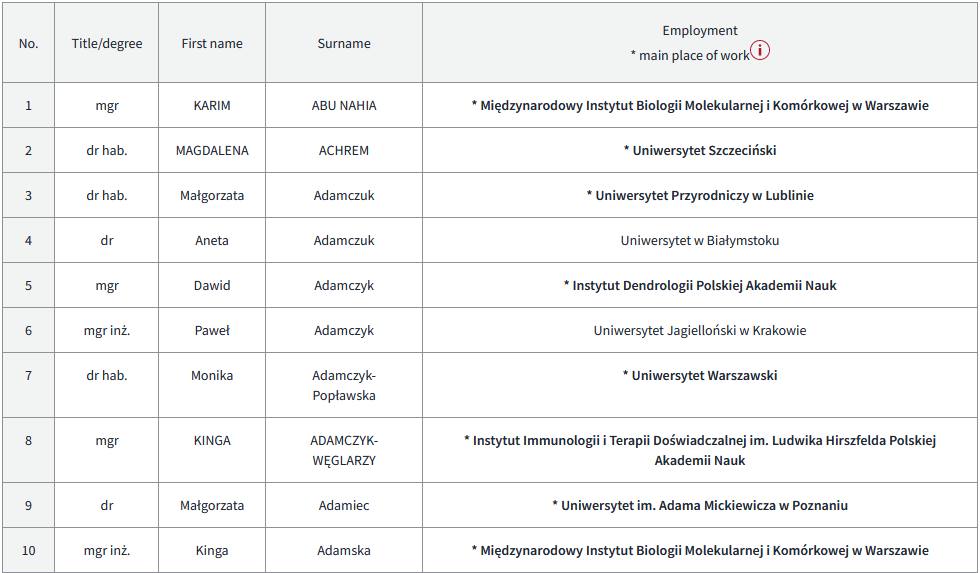

In [16]:
# Odtworzona tabela z użyciem danych z API
df_employees[['personalData.firstName', 'personalData.lastName', 'calculatedEduLevel', 'employingInstitutionName']]

,personalData.firstName,personalData.lastName,calculatedEduLevel,employingInstitutionName
1955,KARIM,ABU NAHIA,mgr,[Międzynarodowy Instytut Biologii Molekularnej...
3325,MAGDALENA,ACHREM,dr hab.,[Uniwersytet Szczeciński]
2157,KINGA,ADAMCZYK-WĘGLARZY,mgr,[Instytut Immunologii i Terapii Doświadczalnej...
1756,MAŁGORZATA,ADAMSKA,dr hab.,[Uniwersytet Szczeciński]
3137,KAMILA,AFFEK,mgr,[Międzynarodowy Instytut Biologii Molekularnej...
...,...,...,...,...
2996,Marek,Żywicki,dr hab.,[Uniwersytet im. Adama Mickiewicza w Poznaniu]
3286,Magdalena,Żywiec,dr hab.,[Instytut Botaniki im. Władysława Szafera Pols...
2570,Waldemar,Żyła,dr,[Muzeum Górnośląskie w Bytomiu]
2090,Dagmara,Żyła,dr,[Muzeum Górnośląskie w Bytomiu]


In [17]:
aggregated_edu_levels = df_employees['calculatedEduLevel'].value_counts()
aggregated_edu_levels

calculatedEduLevel
dr               1647
dr hab.           887
mgr               414
prof. dr hab.     341
mgr inż.          107
lic.               20
inż.               17
mgr, inż.          12
lek. wet.          11
lek.                5
prof. dr            2
Name: count, dtype: int64

In [18]:
aggregated_edu_levels = aggregated_edu_levels[aggregated_edu_levels > 10]
aggregated_edu_levels

calculatedEduLevel
dr               1647
dr hab.           887
mgr               414
prof. dr hab.     341
mgr inż.          107
lic.               20
inż.               17
mgr, inż.          12
lek. wet.          11
Name: count, dtype: int64

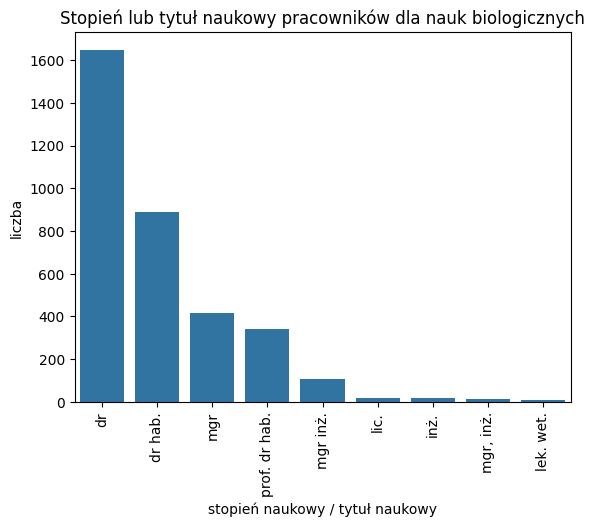

In [19]:
sns.barplot(aggregated_edu_levels)
plt.xticks(rotation=90)
plt.xlabel("stopień naukowy / tytuł naukowy")
plt.ylabel("liczba")
plt.title("Stopień lub tytuł naukowy pracowników dla nauk biologicznych")
plt.show()

### Projects Example

Dokumentacja API do usługi Projekty naukowe POL-on. API umożliwia pobranie publicznie dostępnych danych na temat projektów obejmujących badania naukowe, prace rozwojowe lub upowszechnianie nauki. Dane pochodzą ze zintegrowanej sieci informacji o nauce i szkolnictwie wyższym POL-on i są aktualizowane raz dziennie (w nocy) - prezentowany jest stan danych POL-on z dnia poprzedniego. Podstawa prawna: Ustawa z dnia 20 lipca 2018 roku – Prawo o szkolnictwie wyższym i nauce. 

https://radon.nauka.gov.pl/api/katalog-udostepniania-danych/dane-polon/polon/reports_project

In [20]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", params={'resultNumbers': 2})

response.json()

{'results': [{'projectAbstractEn': 'Neurological disorders (NDs) account for a large and increasing health burden worldwide (the third most common cause of disability and premature death), (Deuschl et al, 2020). The most common neurodegenerative disorders are Alzheimer disease (AD), Parkinson disease (PD) and frontotemporal dementia (FTD). There are some diagnostic methods, e.g. analysis of cerebrospinal fluid (CSF) and molecular imaging of the brain, enabling the stratification of patients, but they are limited as tools for population screening. Amyloid beta (Aβ) and tau protein are invariant determinants of Alzheimer disease (AD). The amyloid-β(42) is considered as AD biomarker that distinguish between AD and frontotemporal dementia (FTD) patients (Jeromin et al, 2019). The α-synuclein (α-Syn), best known for its role in Parkinson’s disease (PD), has been suggested to be involved in cognition and pathogenesis of AD (Korff et al, 2013; Ashton et al, 2020). The selected biomarkers Aβ(4

In [21]:
response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", params={'resultNumbers': 1})
max_count = response.json()['pagination']['maxCount']
number_of_pages = math.ceil(max_count/100)

f"Jest {max_count} rekordów i zostaną pobrane w {number_of_pages} paczkach"

'Jest 32898 rekordów i zostaną pobrane w 329 paczkach'

In [22]:
projects_list = []
token = None

for p in tqdm(range(number_of_pages)):
    response = requests.get("https://radon.nauka.gov.pl/opendata/polon/projects", 
                            params={'resultNumbers': 100, 
                                    'token': token}
                           )
    token = response.json()['pagination']['token']
    projects_list.extend(response.json()['results'])

100%|██████████| 329/329 [07:54<00:00,  1.44s/it]


In [23]:
df_projects = pd.DataFrame.from_records(projects_list)
df_projects_length = df_projects[['projectTitlePl', 'projectTitleEn', 'projectStartDate', 'projectEndDate']]
df_projects_length.head(5)

,projectTitlePl,projectTitleEn,projectStartDate,projectEndDate
0,Multimodalne elektrochemiczno-optyczne układy ...,Photoenhanced multimodal electrochemical-optic...,2022-05-11,2025-05-10
1,Nauka polska w epoce nowożytnej. Idee i ludzie...,None,2022-10-01,2023-05-31
2,Badania kondensatorów elektrochemicznych o wys...,None,2019-04-01,2019-09-30
3,„Zaawansowane i innowacyjne metody edukacji i ...,Building European Nuclear Competence through c...,2022-06-01,2026-05-31
4,Ochrona krajobrazu w ocenach oddziaływania na ...,None,2018-01-01,2018-12-31


In [24]:
df_projects_length['projectStartDate'] = pd.to_datetime(df_projects_length['projectStartDate'])
df_projects_length['projectEndDate'] = pd.to_datetime(df_projects_length['projectEndDate'])

df_projects_length['projectLengthDays'] = df_projects_length['projectEndDate'] - df_projects_length['projectStartDate']
df_projects_length['projectLengthDays'] = df_projects_length['projectLengthDays'].dt.days

C:\Users\micha\AppData\Local\Temp\ipykernel_11960\3812858152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_projects_length['projectStartDate'] = pd.to_datetime(df_projects_length['projectStartDate'])
C:\Users\micha\AppData\Local\Temp\ipykernel_11960\3812858152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_projects_length['projectEndDate'] = pd.to_datetime(df_projects_length['projectEndDate'])
C:\Users\micha\AppData\Local\Temp\ipykernel_11960\3812858152.py:4: SettingWithCopyWarning: 
A valu

In [25]:
df_projects_length[['projectTitlePl', 'projectTitleEn', 'projectStartDate', 'projectEndDate', 'projectLengthDays']].head(5)

,projectTitlePl,projectTitleEn,projectStartDate,projectEndDate,projectLengthDays
0,Multimodalne elektrochemiczno-optyczne układy ...,Photoenhanced multimodal electrochemical-optic...,2022-05-11,2025-05-10,1095
1,Nauka polska w epoce nowożytnej. Idee i ludzie...,None,2022-10-01,2023-05-31,242
2,Badania kondensatorów elektrochemicznych o wys...,None,2019-04-01,2019-09-30,182
3,„Zaawansowane i innowacyjne metody edukacji i ...,Building European Nuclear Competence through c...,2022-06-01,2026-05-31,1460
4,Ochrona krajobrazu w ocenach oddziaływania na ...,None,2018-01-01,2018-12-31,364


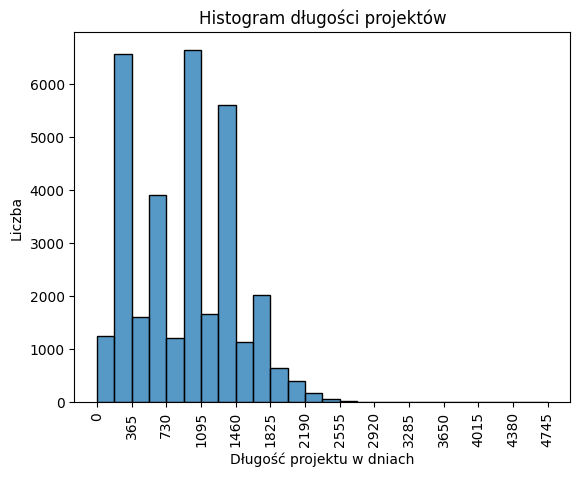

In [28]:
graph = sns.histplot(data=df_projects_length, x='projectLengthDays', binwidth=365/2)

plt.xlabel("Długość projektu w dniach")
plt.ylabel("Liczba")
plt.title("Histogram długości projektów") 

plt.xticks(range(0, 365*14, 365), rotation='vertical')

plt.show()